In [2]:
from sklearn.manifold import TSNE
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import os
from PIL import Image

In [20]:
basedir = 'C:/Users/demo/Downloads/digitalnz-two/'
im_names = [os.path.join(basedir, f) for f in os.listdir(basedir) if f.endswith('jpg')]
print(im_names[0])
images = []
for f in im_names:
    print('\r {}'.format(f), end='', flush=True)
    try:
        images.append(plt.imread(f))
    except OSError:
        os.remove(f)

C:/Users/demo/Downloads/digitalnz-two/001d14e5-175c-48c0-82dd-779b1fc41014.jpg
 C:/Users/demo/Downloads/digitalnz-two/fffffd29-7e71-4490-99e4-430c34499a7e.jpg

In [43]:
d = 300
images = [im for im in images if im.shape[0]>d and im.shape[1]>d]
shapes = [im.shape for im in images]
print(min(shapes))

(302, 500, 3)


In [115]:
def to_color_scale(im):
    if len(im.shape) == 2:
        return np.stack([im for _ in range(3)], axis=-1)
    else:
        return im

In [ ]:
processed = [to_color_scale(im)[0:d, 0:d, :] for im in images]
processed = [p for p in processed if p.shape == (300, 300, 3)]

In [51]:
images = np.stack(processed, axis=0)
images.shape

N = images.shape[0]
images = images.reshape((N, d*d*3))
projector = np.random.standard_normal((d*d*3, 30))
proj = np.dot(images, projector)

(4306, 300, 300, 3)

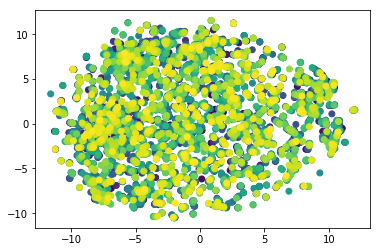

In [73]:
tsne = TSNE(perplexity=5, learning_rate=500, n_iter=100000, n_iter_without_progress=200)
y = tsne.fit_transform(proj)
plt.scatter(y[:, 0], y[:, 1], c=range(len(proj)))

In [69]:
y.shape

(4306, 2)

In [77]:
dist = np.dot(y, y.T)

In [88]:
def show_nearest(i):
    plt.figure()
    plt.imshow(plt.imread(im_names[i]))
    plt.figure()
    plt.imshow(plt.imread(im_names[closest[i]]))

In [111]:
vals = sorted(zip(dist[600,:], range(len(dist))))
vals = [idx for d, idx in vals]
# print(np.argmax(vals))
# vals

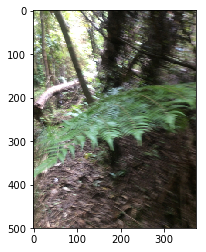

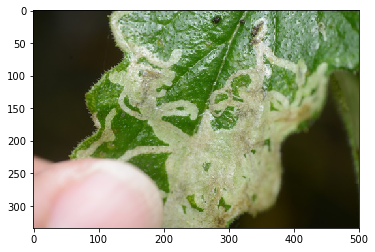

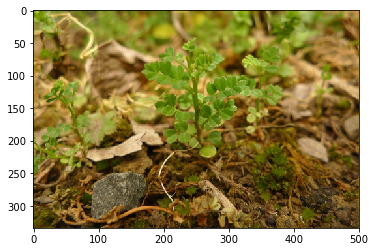

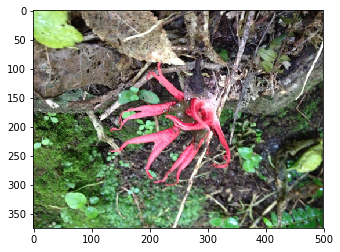

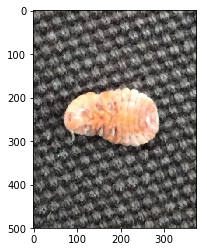

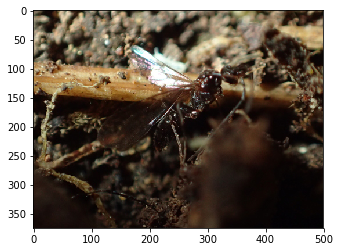

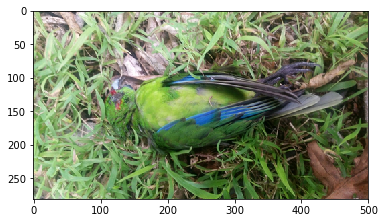

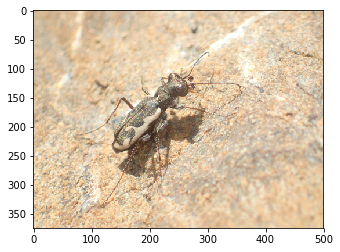

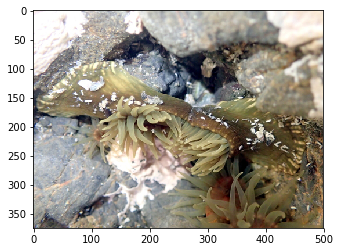

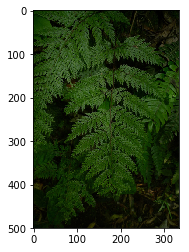

In [112]:
for i in vals[-10:]:
    plt.figure()
    plt.imshow(plt.imread(im_names[i]))

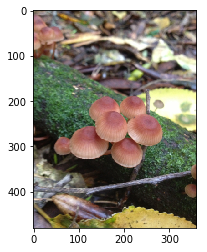

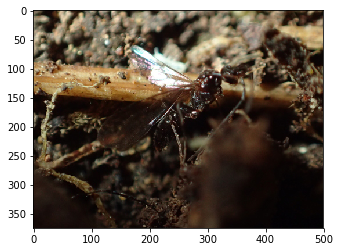

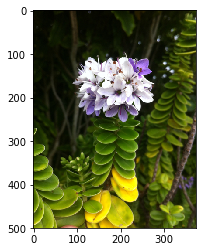

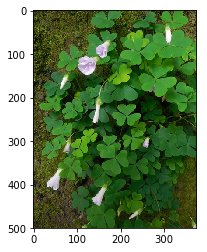

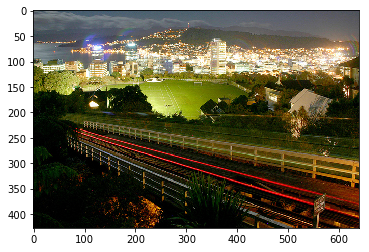

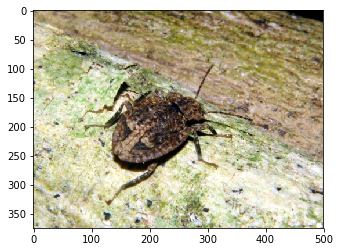

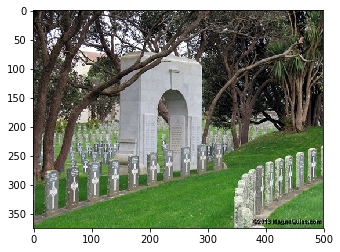

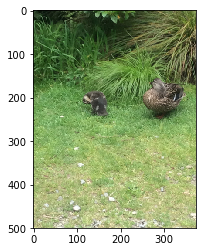

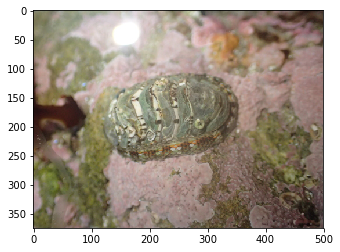

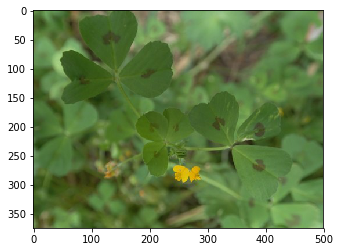

In [113]:
for i in range(20, 25):
    show_nearest(i)